<a href="https://colab.research.google.com/github/adityarajiitmd/Deep-Learning-and-NLP/blob/main/Image_Search_using_Sentence_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets sentence_transformers

In [ ]:
#image library to edit images
from PIL import Image
#dataset library of hugging face
from datasets import load_dataset

from sentence_transformers import SentenceTransformer, util

In [ ]:
fashion = load_dataset(
    "ashraq/fashion-product-images-small",
    split="train"
)

In [ ]:
fashion[0]

{'id': 15970,
 'gender': 'Men',
 'masterCategory': 'Apparel',
 'subCategory': 'Topwear',
 'articleType': 'Shirts',
 'baseColour': 'Navy Blue',
 'season': 'Fall',
 'year': 2011.0,
 'usage': 'Casual',
 'productDisplayName': 'Turtle Check Men Navy Blue Shirt',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>}

In [ ]:
fashion.features

{'id': Value(dtype='int64', id=None),
 'gender': Value(dtype='string', id=None),
 'masterCategory': Value(dtype='string', id=None),
 'subCategory': Value(dtype='string', id=None),
 'articleType': Value(dtype='string', id=None),
 'baseColour': Value(dtype='string', id=None),
 'season': Value(dtype='string', id=None),
 'year': Value(dtype='float64', id=None),
 'usage': Value(dtype='string', id=None),
 'productDisplayName': Value(dtype='string', id=None),
 'image': Image(decode=True, id=None)}

In [ ]:
images = fashion["image"]
fashion=fashion.remove_columns("image")

fashion_frame=fashion.to_pandas()

In [ ]:
model = SentenceTransformer('clip-ViT-B-32')

In [ ]:
product_number=0

text_embedding = model.encode([fashion_frame['productDisplayName'][product_number]])
image_embedding=model.encode(images[product_number])

query="blue jeans"
query_embedding = model.encode(query)

In [ ]:
cosine = util.cos_sim(image_embedding, query_embedding)
cosine

tensor([[0.2068]])

In [ ]:
image_embeddings = model.encode([image for image in images])

In [ ]:
results = util.semantic_search(query_embedding, image_embeddings, top_k=10)[0]

In [ ]:
def img_search(query, k=10):
    query_embedding = model.encode([query])
    results = util.semantic_search(query_embedding, image_embeddings, top_k=k)[0]
    for r in results:
        display(images[r['corpus_id']])

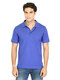

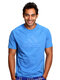

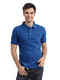

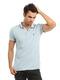

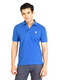

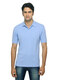

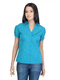

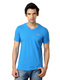

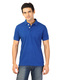

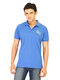

In [ ]:
img_search('blue shirt')